In [1]:
# 

# ONLINE RETAIL DATASET

# Data description

The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.



# Column Descriptors

 - StockCode: A code used to identify the product that was purchased
 - Description: A brief description of the product that was purchased
 - Quantity: The quantity of the product that was purchased
 - InvoiceDate: The date and time that the purchase was made
 - UnitPrice: The price of one unit of the product that was purchased
 - CustomerID: The unique identifier for the customer who made the purchase
 - Country: The country where the customer who made the purchase is located

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
df=pd.read_csv(r"D:\DATASET\Online Retail transactions Dataset\Online Retail.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [7]:
# change the datatype of invoice into int
# invoice date is  change from object to int

In [8]:
df['CustomerID'].dtypes

dtype('int64')

In [9]:
# duplicated rows
df.duplicated().sum()

5268

In [10]:
# Drop duplicate value
df = df.drop_duplicates()
# Check is there any duplicate value
df.duplicated().sum()

0

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15282.630153
std,219.130156,97.233118,1482.756881
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


 - In quantity and unit price there is large difference b/w 75% and max ok these column
 - unitPrice and quantity column has negative value.
 - but in actual unitPrice and Quantity cant be negative

 - We can observe from the preceding output that Quantity and UnitPrice are having negative values, which may mean that we may have some return transactions in our data also. As our goal is customer segmentation and market basket analysis, it is important that these records are removed.

In [12]:
print('Check if we had negative quantity and prices at same customerid:')
if df[(df['Quantity'] < 0) & (df['UnitPrice'] < 0)].shape[0]==0:
    print('no')
else:
    print('yes')


Check if we had negative quantity and prices at same customerid:
no


In [13]:
df_quant_minus_unit_zero=df[(df['Quantity'] < 0) & (df['UnitPrice'] == 0)].shape[0]
print(f"No. of customer with quantity purchased is in negative AND unit price is zero  are :- {df_quant_minus_unit_zero} ")

print()


df_quant_minus_unit_minus=df[(df['Quantity'] < 0) & (df['UnitPrice']< 0)].shape[0]
print(f"No. of customer with quantity purchased is in negative 'AND' unit price is also in negative  are :- {df_quant_minus_unit_minus} ")

print()

df_quant_neg_OR_unitprice_neg=df[(df['Quantity'] < 0) | (df['UnitPrice']< 0)].shape[0]
print(f"No. of customer with quantity purchased is in nagative 'OR' unit price is negative  are :- {df_quant_neg_OR_unitprice_neg} ")

print()

df_quant_neg=df[(df['Quantity'] < 0)].shape[0]
print(f"No. of customer with quantity purchased is in negative :- {df_quant_neg} ")

print()

df_quant_pos_unit_neg=df[(df['Quantity']> 0) & (df['UnitPrice'] <0)].shape[0]
print(f"No. of customer with quantity purchased is in positive AND unit price is negative  are :- {df_quant_pos_unit_neg} ")

No. of customer with quantity purchased is in negative AND unit price is zero  are :- 1336 

No. of customer with quantity purchased is in negative 'AND' unit price is also in negative  are :- 0 

No. of customer with quantity purchased is in nagative 'OR' unit price is negative  are :- 10589 

No. of customer with quantity purchased is in negative :- 10587 

No. of customer with quantity purchased is in positive AND unit price is negative  are :- 2 


####  1336 rows where quantity is -ve and unit price is 0  , maximum chance are there that these items are returned

In [14]:
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [15]:
df[df['InvoiceNo'].str.startswith('C')].shape[0]

9251

In [16]:
# Invoice start with C , it repesent the order is retured or cancel

In [17]:
df[(df['Quantity'] < 0) | (df['UnitPrice']< 0)].shape[0]

# quantity is in -ve or unit price is less than 0

10589

In [18]:
del_rows=df[(df['Quantity'] < 0)].shape[0]
del_rows

# del. rows where quantity is negative, bcz these are returned order,  and it will not help in our analysis

10587

#### 10587 quantity are -ve , either these quantity are returned or there are some human error while entering data

In [19]:
del_rows = df[df['Quantity'] < 0].index

# Drop the rows from the DataFrame
df.drop(del_rows, inplace=True)

In [20]:
df.shape

(526054, 8)

In [21]:
df[(df['Quantity']> 0) & (df['UnitPrice'] <0)]

# these are the 2 rows where unit price is -ve,  means the money is refunded back for the canceled order or returned order

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


In [22]:
# here the unit price is -ve and quatity is 1,, description mention 'Adust bad debt'  and the Customerid is same

In [23]:
df[df['UnitPrice'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


In [24]:
df.drop([299983, 299984], inplace=True)

# dropping those rows where the unit price is in -ve

In [25]:
df.shape

(526052, 8)

In [26]:
print('Finding')

print(f"1.  unit price is 0 in :- {df[df['UnitPrice']==0 ].shape[0]} rows")
print()
print(f"2.  unit price is 0 and customer id is 15287 is :- {df[(df['UnitPrice']==0) & (df['CustomerID']==15287) ].shape[0]}  rows")
print()
print(f"3.  unit price is 0  , customer id is 15287  and  country name United Kingdom :-  {df[(df['UnitPrice']==0) & (df['CustomerID']==15287) &(df['Country']=='United Kingdom') ].shape[0]}  rows")

Finding
1.  unit price is 0 in :- 1174 rows

2.  unit price is 0 and customer id is 15287 is :- 1134  rows

3.  unit price is 0  , customer id is 15287  and  country name United Kingdom :-  1132  rows


#### finding -  1132 rows are belongs to same customerID with same country and unit price is 0

In [27]:
df[(df['UnitPrice']==0) & (df['CustomerID']==15287)  & (df['Description'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
533712,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,15287,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,15287,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,15287,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom


In [28]:
# 592 rows have same customerid , and no description is mentioned, even unit price is 0

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [30]:
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description    592
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

In [31]:
# there are 1454 null value in description column

In [32]:
#no. of unique
#total count
# null
#unique
# dtype

In [33]:
feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage=[]

for column in df.columns:
    feature.append(column)
    count.append(len(df[column]))
    missing.append(df[column].isnull().sum())
    unique.append(df[column].nunique())
    missing_percentage.append((df[column].isnull().sum() / df.shape[0]) * 100)
    dtypes.append(df[column].dtypes)
    
dataframe=pd.DataFrame({'feature':feature,
             'count':count,
             'missing':missing,
             'nunique':unique,
              'missing_percentage':missing_percentage,
              'dtypes':dtypes
              
             }) 
dataframe.set_index('feature')

,count,missing,nunique,missing_percentage,dtypes
feature,,,,,
InvoiceNo,526052,0,20726,0.000000,object
StockCode,526052,0,3941,0.000000,object
Description,526052,592,4077,0.112536,object
Quantity,526052,0,393,0.000000,int64
InvoiceDate,526052,0,19050,0.000000,object
UnitPrice,526052,0,1292,0.000000,float64
CustomerID,526052,0,4339,0.000000,int64
Country,526052,0,38,0.000000,object


# Stock code

-  the "StockCode" column in the Online Retail Transactions dataset refers to a unique identifier assigned to each product sold by the retailer. 
- The StockCode column can be useful for identifying specific products and tracking their sales over time. It may also be used to group products by category, brand, or other attributes.
- When working with the StockCode column, it may be helpful to review the product descriptions in the Description column to get a better understanding of what each code represents. You may also want to consider preprocessing the data to group similar products together or standardize the codes if possible.

In [34]:
df['StockCode'].nunique()

# no. of unique in stockcode 

3941

In [35]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [36]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
                                      ... 
LUNCH BAG RED SPOTTY                     1
SET/5 RED SPOTTY LID GLASS BOWLS         1
FRYING PAN RED POLKADOT                  1
BLUE PAINTED KASHMIRI CHAIR              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 4077, dtype: int64

In [37]:
df['StockCode'].nunique()

3941

In [38]:
df['Description'].nunique()

4077

In [39]:
df.groupby('StockCode').count()

# it shows the no. of diff feature attached with stockcode.  , 72 invoice no. are of same stock code
# this information plays vital role in understanding the data more deeply
# stockcode refer to - refers to a unique identifier assigned to each product sold by the retailer

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,,
10002,72,71,72,72,72,72,72
10080,24,23,24,24,24,24,24
10120,29,29,29,29,29,29,29
10123C,3,3,3,3,3,3,3
10124A,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...
gift_0001_20,10,10,10,10,10,10,10
gift_0001_30,8,7,8,8,8,8,8
gift_0001_40,3,3,3,3,3,3,3


In [40]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Filling missing value in Description column

# Description column

- The "Description" column in the Online Retail Transactions dataset provides a brief description of each product purchased in a transaction.
- The descriptions are based on the retailer's internal product codes and may not be very detailed or consistent. Some descriptions include information such as the type of product, the brand, the color, and the size
- Description column can provide valuable insights into which products are being purchased and can be used for various types of analysis, such as identifying popular products or analyzing sales trends for specific product categories.

In [41]:
# some rows in description column are having question mark.  so taht filling that values with np.nan

df.replace(to_replace = '??', value = np.nan, inplace=True)
df.replace(to_replace = '?', value = np.nan, inplace=True)

In [42]:
df[df['Description'].isnull()].groupby('StockCode').first()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,,
10002,548286,None,180,2011-03-30 11:47:00,0.0,15287,United Kingdom
10080,561271,None,170,2011-07-26 12:18:00,0.0,15287,United Kingdom
15030,548399,None,150,2011-03-30 17:25:00,0.0,15287,United Kingdom
15058A,545551,None,20,2011-03-03 15:11:00,0.0,15287,United Kingdom
15060B,577339,None,9,2011-11-18 14:57:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...
C2,575506,None,150,2011-11-10 10:30:00,0.0,15287,United Kingdom
DOT,547966,None,1000,2011-03-28 15:49:00,0.0,15287,United Kingdom
POST,540699,None,1000,2011-01-11 09:32:00,0.0,15287,United Kingdom


In [43]:
# where description is nan - the country is united kingdom and unit price = 0

In [44]:
df[df['Description'].isna()]['StockCode'].to_frame().reset_index().rename(columns={'index':'description_missing_at_row'})

# it shows those row where the description is missing and the stokcode of that particular row

# it shows those row no. where the description is missing and also shows the respective stockcode

,description_missing_at_row,StockCode
0,622,22139
1,1970,21134
2,1971,22145
3,1972,37509
4,1987,85226A
...,...,...
593,533712,22689
594,535326,23406
595,535332,21620
596,536981,72817


In [45]:
desc_map = df.groupby('StockCode')['Description'].first().to_dict()
desc_map

# Description available for diff stock code

{'10002': 'INFLATABLE POLITICAL GLOBE ',
 '10080': 'GROOVY CACTUS INFLATABLE',
 '10120': 'DOGGY RUBBER',
 '10123C': 'HEARTS WRAPPING TAPE ',
 '10124A': 'SPOTS ON RED BOOKCOVER TAPE',
 '10124G': 'ARMY CAMO BOOKCOVER TAPE',
 '10125': 'MINI FUNKY DESIGN TAPES',
 '10133': 'COLOURING PENCILS BROWN TUBE',
 '10135': 'COLOURING PENCILS BROWN TUBE',
 '11001': 'ASSTD DESIGN RACING CAR PEN',
 '15030': 'FAN BLACK FRAME ',
 '15034': 'PAPER POCKET TRAVELING FAN ',
 '15036': 'ASSORTED COLOURS SILK FAN',
 '15039': 'SANDALWOOD FAN',
 '15044A': 'PINK PAPER PARASOL ',
 '15044B': 'BLUE PAPER PARASOL ',
 '15044C': 'PURPLE PAPER PARASOL',
 '15044D': 'RED PAPER PARASOL',
 '15056BL': 'EDWARDIAN PARASOL BLACK',
 '15056N': 'EDWARDIAN PARASOL NATURAL',
 '15056P': 'EDWARDIAN PARASOL PINK',
 '15056bl': 'EDWARDIAN PARASOL BLACK',
 '15056n': 'EDWARDIAN PARASOL NATURAL',
 '15056p': 'EDWARDIAN PARASOL PINK',
 '15058A': 'BLUE POLKADOT GARDEN PARASOL',
 '15058B': 'PINK POLKADOT GARDEN PARASOL',
 '15058C': 'ICE CREAM DES

In [46]:
# now i have to map the groupby stockcode column and fill the missing value at description column

In [47]:
df['Description']=df['Description'].fillna(df['StockCode'].map(desc_map))

# filling the nan description with the stock code respective description

In [48]:
df.isnull().sum()

# there are some rows in description columns , which don't have respective groupby object.
#so unable to fill this with with description column .  so that it is better to remove the 112 rows

InvoiceNo       0
StockCode       0
Description    16
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
dtype: int64

In [49]:
df.dropna(inplace=True)

# dropping the null values

In [50]:
df.isnull().sum()

# now in this dataset there is no null value

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [51]:
df[(df['UnitPrice']==0) & (df['CustomerID']==15287)  & (df['Description'].isnull())].shape[0]

# erlier the customerid= 15287  was very untidy customer id,  but after cleaning the data and filling the description
# now it no more untidy customer id

0

In [52]:
df[(df['UnitPrice']==0) & (df['CustomerID']==15287) ].shape[0]

1118

# work on InvoiceDate

In [53]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# converting the invoiceDate column into the date time format,  to fetch some of the usefull information from here

In [54]:
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [55]:
df['year']= df['InvoiceDate'].dt.year
df['month']= df['InvoiceDate'].dt.month
df['day']= df['InvoiceDate'].dt.day

df['day_of_week'] = df['InvoiceDate'].dt.weekday
df['hour']= df['InvoiceDate'].dt.hour
days = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'}
df['week_name'] = df['day_of_week'].apply(lambda x: days[x])

df.sample(4)




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,day_of_week,hour,week_name
133504,547788,21638,ASSORTED TUTTI FRUTTI NOTEBOOK,1,2011-03-25 12:00:00,4.13,15287,United Kingdom,2011,3,25,4,12,Fri
190347,553189,22549,PICTURE DOMINOES,2,2011-05-15 13:14:00,1.45,15033,United Kingdom,2011,5,15,6,13,Sun
443225,574696,21824,PAINTED METAL STAR WITH HOLLY BELLS,6,2011-11-06 13:40:00,0.39,13634,United Kingdom,2011,11,6,6,13,Sun
43383,540033,21060,PARTY INVITES BALLOON GIRL,5,2011-01-04 14:12:00,0.85,13680,United Kingdom,2011,1,4,1,14,Tues


In [56]:
# fetching the day, month, year, days of week , hour

# Total prize

In [57]:
df['toal_amount']=df['Quantity'] * df['UnitPrice']

In [58]:
# column transform --   total amount is important column fetching by multiplying the quantity and unit price

In [59]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,day_of_week,hour,week_name,toal_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,8,Wed,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,8,Wed,20.34


# working on Description column

 - **Tokenization**: Break the text data into individual words or tokens. This can be done using various techniques, such as splitting on whitespace, using regular expressions, or using a library like NLTK.

 - **Normalization:** Convert the tokens to a standard format, such as converting all text to lowercase or removing punctuation marks.

 - **Stopword removal:** Remove common words that do not provide much meaning, such as "the", "and", and "in".

 - **Stemming or lemmatization:** Convert each token to its base form, such as converting "running" to "run". This can be done using various techniques, such as the Porter stemmer or WordNet lemmatizer.

 - **Vectorization:** Convert the text data into a numerical format that can be used in machine learning models. This can be done using techniques like bag-of-words or TF-IDF.
***


In [60]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,day_of_week,hour,week_name,toal_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,8,Wed,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,8,Wed,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,8,Wed,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,8,Wed,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,8,Wed,20.34


In [61]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2316
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
                                      ... 
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
TRAVEL CARD WALLET DOTCOMGIFTSHOP        1
BELL HEART ANTIQUE GOLD                  1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 4076, dtype: int64

In [62]:
# lower case

In [63]:
df['Description']=df['Description'].str.lower()

# cahnging into lower case

In [64]:
# removing punctuation

In [65]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [66]:
exclude = string.punctuation

In [67]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))



In [68]:
df['Description']=df['Description'].apply(remove_punc1)

# removinng punctuation mark

In [69]:
df['Description'].sample(40)

307356         set of 4 knick knack tins leaf
12794           traditional christmas ribbons
109295    set 3 song bird paper eggs assorted
386390      jumbo shopper vintage red paisley
183079                 regency tea plate pink
63382              pack of 12 london tissues 
59602       white hanging heart tlight holder
348310          sweetheart 3 tier cake stand 
47318        food container set 3 love heart 
20426               pink love heart shape cup
170266              pink love heart shape cup
443947            ribbon reel making snowmen 
436222         skull and crossbones  garland 
99389                  wooden box of dominoes
327232        beaded crystal heart pink large
302082         biscuits small bowl light blue
108871            box of 24 cocktail parasols
416972      set of 12 fairy cake baking cases
68821             hand warmer babushka design
482121           set6 pink  butterfly tlights
322893           set6 red spotty paper plates
382141                pharmacie fi

# Plot analysis based on heading like -

 - Total sales analysis
 - Customer segmentation analysis
 - Product analysis 
 - Market basket analysis
 - Geospatial analysis:


 - **Total sales analysis:** Calculate the total sales amount for each transaction and analyze the sales trends over time (by day, week, or month). Identify which products are the top sellers and which customers make the most purchases.

 - **Customer segmentation analysis:** Segment the customers based on their purchasing behavior and demographic data (if available). Identify the high-value customers and understand their preferences, purchase history, and buying habits.

 - ****Product analysis:** Analyze the product data to identify which products are selling the most and which products have the highest profit margins. Understand the relationship between product price, quantity sold, and profit margins.

 - **Market basket analysis:** Identify which products are frequently purchased together by analyzing the transaction data. Use this information to develop targeted marketing strategies and product recommendations.

 - **Geospatial analysis:** Analyze the customer data by location to understand which regions have the highest sales volume and which areas are underserved. Use this information to develop targeted marketing campaigns and expand the customer base.
***



<AxesSubplot:xlabel='week_name', ylabel='count'>

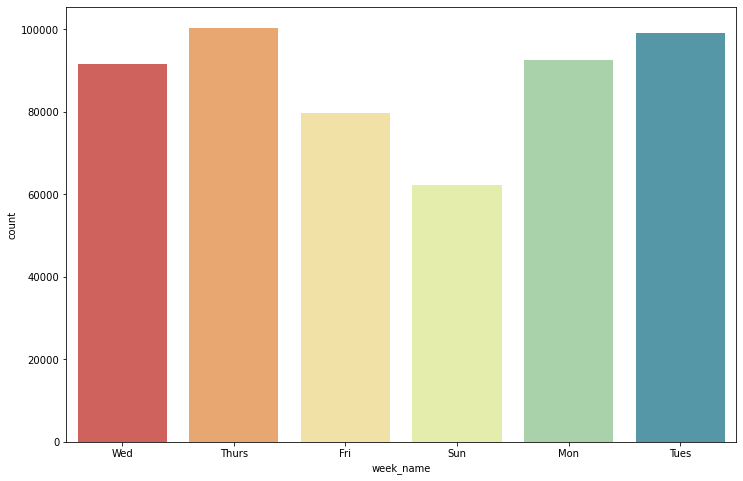

In [70]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='week_name',palette = "Spectral")

In [71]:
# saturday is not in the data

In [72]:
check=df.groupby('week_name')['toal_amount'].sum().to_dict()

In [73]:
check.keys()

dict_keys(['Fri', 'Mon', 'Sun', 'Thurs', 'Tues', 'Wed'])

In [74]:
check.values()

dict_values([1837470.491, 1775782.071, 806790.781, 2199292.57, 2175700.511, 1847074.38])

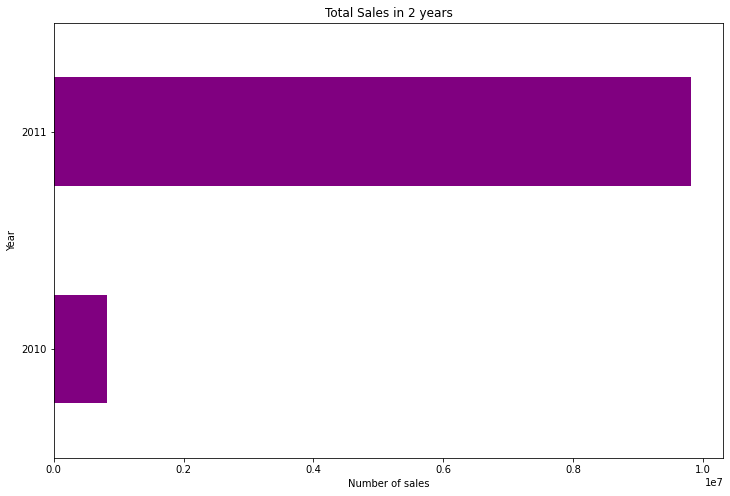

In [75]:
df_year = df.groupby(by=['year']).sum()['toal_amount'].plot(kind='barh',figsize=(12,8),color='purple')
plt.title('Total Sales in 2 years')
plt.xlabel('Number of sales')
plt.ylabel('Year')
plt.show()

In [76]:
# 2011 sales is much more higher then 2010 sales,  it is bcz, in 2010 there is data of only dec month

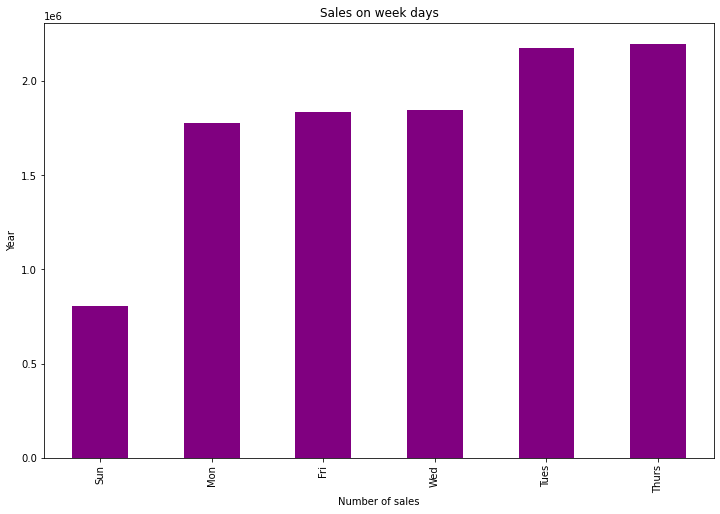

In [77]:
df_year = df.groupby(by=['week_name']).sum()['toal_amount'].sort_values().plot(kind='bar',figsize=(12,8),color='purple')
plt.title('Sales on week days')
plt.xlabel('Number of sales')
plt.ylabel('Year')
#plt.yscale('log')
plt.show()


In [78]:
# minmum spending on sun - 
# maximum spending in tuesday and thrusday

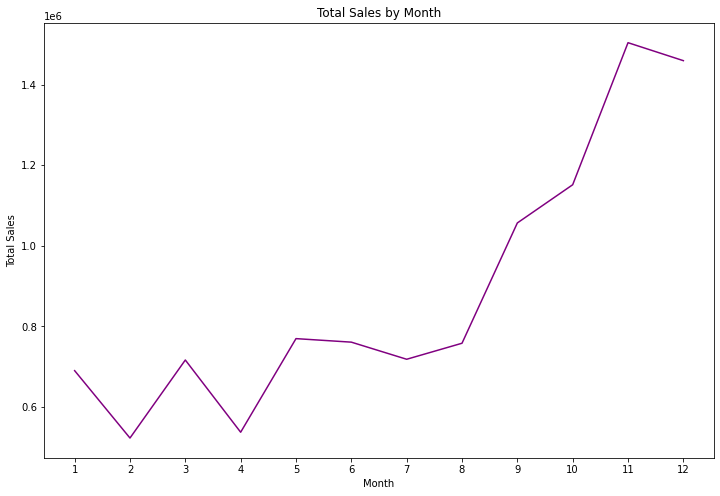

In [79]:
# Compute total sales by month
sales_by_month = df.groupby('month')['toal_amount'].sum()
plt.figure(figsize=(12,8))
# Plot the sales by month
sales_by_month.plot(kind='line',color='purple')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.show()

In [80]:
#  month on month progess is noticed in the data
# customer is purchasing more from april month to nov month  the slightlyfall on in the dec month

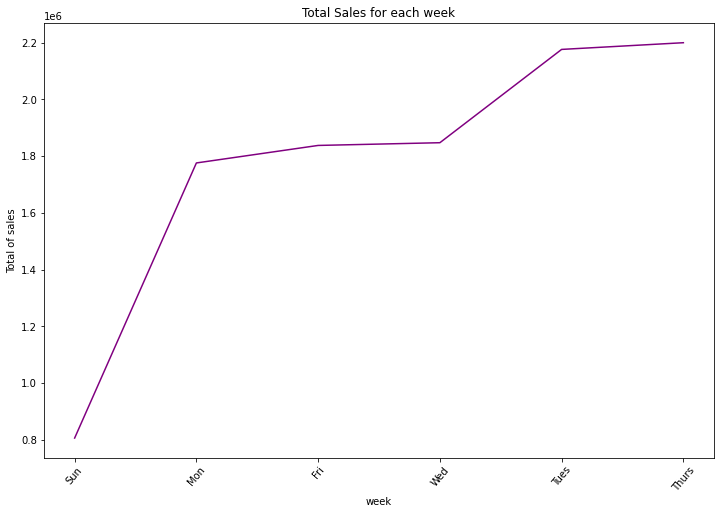

In [81]:
df_week = df.groupby(by=['week_name']).sum()['toal_amount'].sort_values(ascending=True).plot(kind='line',figsize=(12,8),color='purple')
plt.title('Total Sales for each week')
plt.ylabel('Total of sales')
plt.xlabel('week')
plt.xticks(rotation=50)
plt.show()

In [82]:
# on tuesday and thrusday is people are more like to buy product in comparision to sunday
# most probably it is due to the geographical reason

In [83]:
df.groupby(by=['Country']).sum()['toal_amount'].sort_values(ascending=False)

Country
United Kingdom          9001744.094
Netherlands              285446.340
EIRE                     283140.520
Germany                  228678.400
France                   209625.370
Australia                138453.810
Spain                     61558.560
Switzerland               57067.600
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33683.050
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15483.000
Cyprus                    13502.850
Austria                   10198.680
Israel                     8129.410
Poland                     7334.650
Greece                     4760.520
Unspecified                4740.940
Iceland                    4310.000
Canada                     3666.380
USA                 

In [84]:
# the data is mostly focused on UK , so that the most no. of spending is showing for UK

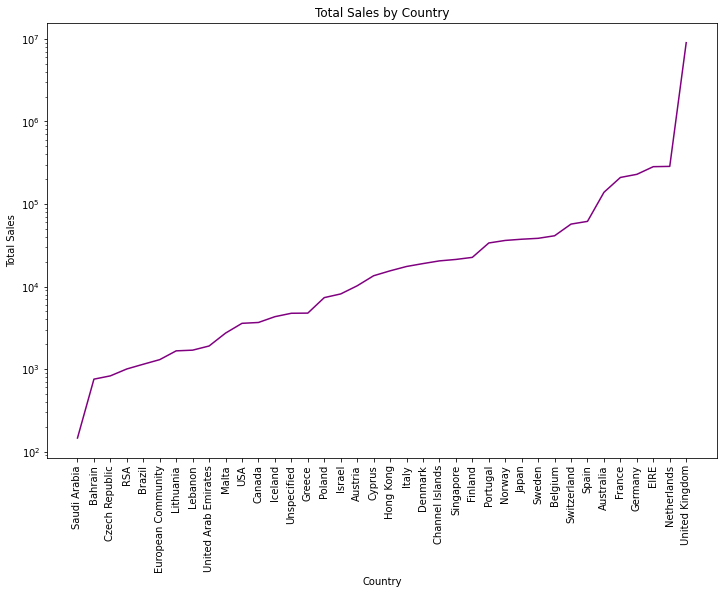

In [85]:

df_country = df.groupby(by=['Country']).sum()['toal_amount'].sort_values(ascending=True)

plt.figure(figsize=(12,8))
plt.plot(df_country.index, df_country.values,color='purple')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

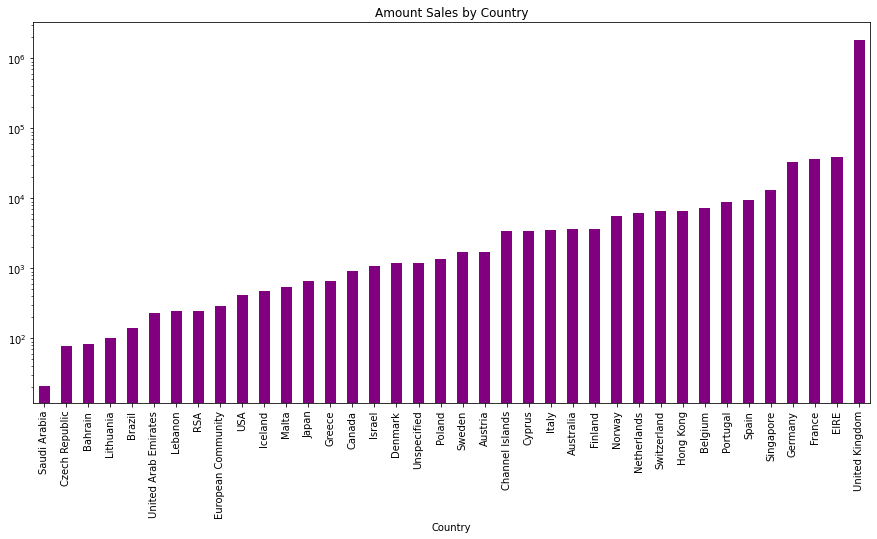

In [86]:
plt.figure(figsize=(15, 7))

df.groupby(["Country"])['UnitPrice'].sum().sort_values(ascending = True).plot(kind='bar', title='Amount Sales by Country',color='purple')
plt.yscale('log')

In [87]:
df['c_uk'] = df['Country'].apply(lambda x: 'UK' if x=='United Kingdom' else 'Other_country' )

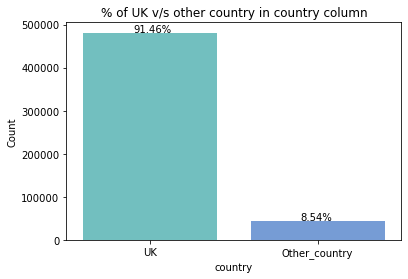

In [88]:
# Create countplot on the 'isFraud' column
ax = sns.countplot(x='c_uk', data=df,palette="winter_r",alpha=.6)

# Set plot title and axis labels
plt.title('% of UK v/s other country in country column')
plt.xlabel('country')
plt.ylabel('Count')

# Add percentage values to the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total) * 100:.2f}%', (p.get_x() + 0.3, height + 1000))

# Show the plot
plt.show()

### most of the data is related to UK country

In [89]:
df.drop('c_uk',inplace=True,axis=1)

In [90]:
# most valuable customer

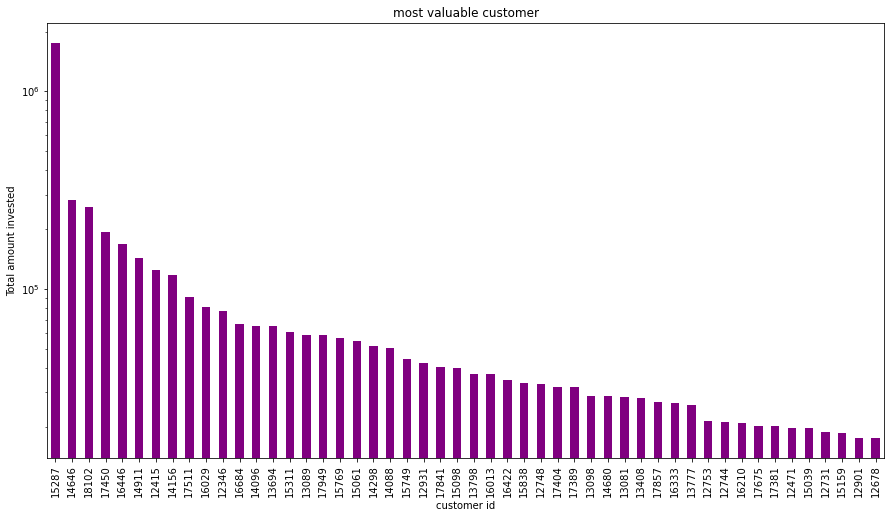

In [91]:
plt.figure(figsize=(15,8))

most_valuable_50_cust=df.groupby('CustomerID')['toal_amount'].sum().sort_values(ascending=False).iloc[:50]
most_valuable_50_cust.plot(kind='bar',color='purple')
plt.title('most valuable customer')
plt.xlabel('customer id')
plt.ylabel('Total amount invested')
plt.yscale('log')
plt.show()

In [92]:
# customer id - 15287  -  is the most frequent buyer as well as he spend most no. of money

In [93]:
df_sales_item_2011 = df.groupby(['Description','year']).mean()
df_sales_item_2011 = df_sales_item_2011.unstack('year')['toal_amount']
df_sales_item_2011 = df_sales_item_2011.sort_values(by=2011,ascending=False)[2011]
df_sales_item_2011

Description
paper craft  little birdie            168469.60
picnic basket wicker 60 pieces         19809.75
adjust bad debt                        11062.06
tea time tea towels                     3022.50
miseltoe heart wreath cream              996.00
                                        ...    
white christmas flock droplet               NaN
white dove honeycomb paper garland          NaN
wrap  pink flock                            NaN
wrap blue russian folkart                   NaN
wrap green russian folkart                  NaN
Name: 2011, Length: 4059, dtype: float64

In [94]:
# paper craft little birdie -  this is the most selling product in 2011

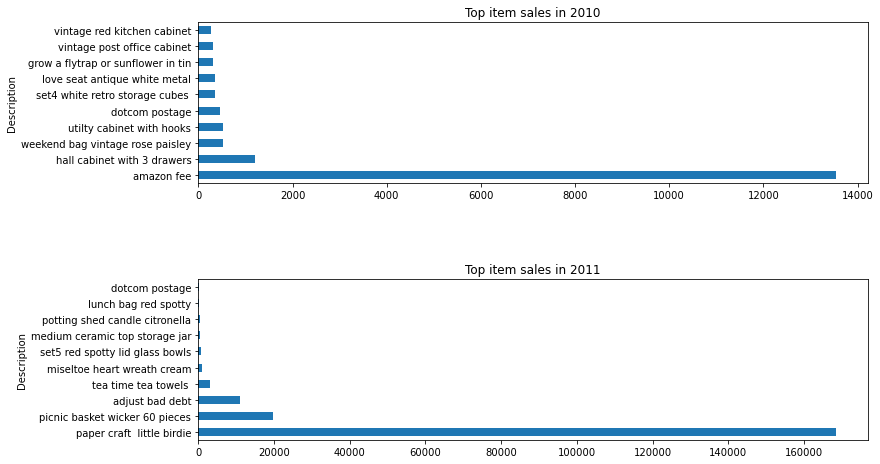

In [95]:
plt.subplot(2,1,1)
# creating the bar plot
des_2010_sale = df.groupby(['Description','year']).mean()
des_2010_sale = des_2010_sale.unstack('year')['toal_amount']
des_2010_sale = des_2010_sale.sort_values(2010,ascending=False)[2010].head(10).plot(kind='barh',figsize=(12,8))
plt.title("Top item sales in 2010")


plt.subplot(2,1,2)
des_2011_sale = df.groupby(['Description','year']).mean()
des_2011_sale = des_2011_sale.unstack('year')['toal_amount']
des_2011_sale = des_2011_sale.sort_values(2011,ascending=False)[2011].head(10).plot(kind='barh',figsize=(12,8))

plt.title("Top item sales in 2011")


plt.subplots_adjust(hspace = 0.6, top = 0.85)
plt.show()

In [96]:
#  paper craft little birdies is the best selling product in 2011

# amazon fee is most paying item in 2010

In [97]:
df_sales_item_2010_every_month = df.groupby(['month','year']).sum()
df_sales_item_2010_every_month = df_sales_item_2010_every_month.unstack('year')
df_sales_item_2010_every_month

Quantity            UnitPrice               CustomerID                \
year       2010      2011       2010        2011         2010          2011   
month                                                                         
1           NaN  397030.0        NaN  128987.150          NaN  5.185670e+08   
2           NaN  284787.0        NaN  107600.480          NaN  4.126222e+08   
3           NaN  384023.0        NaN  144929.080          NaN  5.414477e+08   
4           NaN  311314.0        NaN  115129.081          NaN  4.423952e+08   
5           NaN  398686.0        NaN  149789.680          NaN  5.491160e+08   
6           NaN  393633.0        NaN  139565.420          NaN  5.480680e+08   
7           NaN  405473.0        NaN  142528.261          NaN  5.884846e+08   
8           NaN  424264.0        NaN  137903.100          NaN  5.241051e+08   
9           NaN  574165.0        NaN  173874.922          NaN  7.472358e+08   
10          NaN  626373.0        NaN  221646.600          NaN  8.943148e+08   
11          NaN  768466.0        NaN  297325.200          NaN  1.259606e+09   
12     360999.0  314416.0  198647.06  100946.010  635456015.0  3.803822e+08   

            day            day_of_week                hour             \
year       2010       2011        2010      2011      2010       2011   
month                                                                   
1           NaN   565601.0         NaN   78198.0       NaN   447647.0   
2           NaN   400690.0         NaN   59832.0       NaN   342059.0   
3           NaN   604961.0         NaN   82229.0       NaN   461957.0   
4           NaN   417286.0         NaN   64445.0       NaN   371831.0   
5           NaN   547308.0         NaN   90836.0       NaN   471445.0   
6           NaN   541285.0         NaN   87764.0       NaN   474313.0   
7           NaN   604651.0         NaN   93283.0       NaN   511175.0   
8           NaN   549955.0         NaN   78992.0       NaN   440321.0   
9           NaN   820989.0         NaN  134407.0       NaN   635632.0   
10          NaN   965606.0         NaN  135436.0       NaN   771585.0   
11          NaN  1335621.0         NaN  209769.0       NaN  1082162.0   
12     418828.0   131686.0    101733.0   60335.0  542252.0   325323.0   

      toal_amount               
year         2010         2011  
month                           
1             NaN   689811.610  
2             NaN   522545.560  
3             NaN   716215.260  
4             NaN   536968.491  
5             NaN   769296.610  
6             NaN   760547.010  
7             NaN   718076.121  
8             NaN   757841.380  
9             NaN  1056435.192  
10            NaN  1151263.730  
11            NaN  1503866.780  
12      821452.73   637790.330

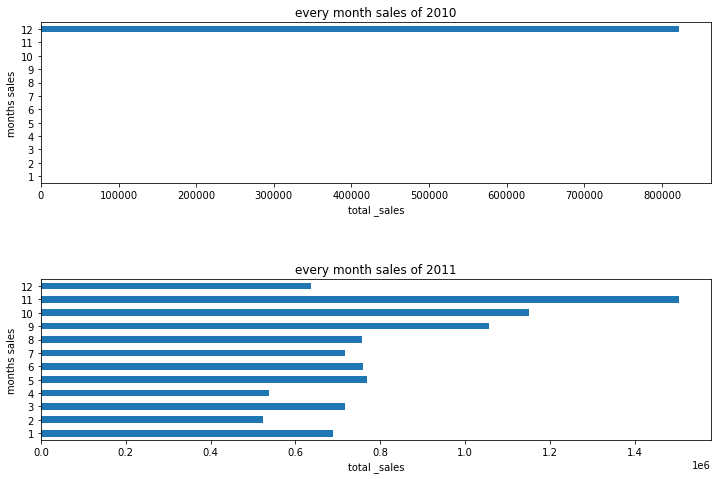

In [98]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
df_sales_item_2010_every_month = df.groupby(['month','year']).sum()
df_sales_item_2010_every_month = df_sales_item_2010_every_month.unstack('year')['toal_amount'][2010]
df_sales_item_2010_every_month.plot(kind='barh',)
plt.title('every month sales of 2010')
plt.xlabel('total _sales')
plt.ylabel('months sales')


plt.subplot(2,1,2)
df_sales_item_2011_every_month = df.groupby(['month','year']).sum()
df_sales_item_2011_every_month = df_sales_item_2011_every_month.unstack('year')['toal_amount'][2011]
#df_sales_item_2011_every_month = df_sales_item_2011_every_month[2011]
df_sales_item_2011_every_month.plot(kind='barh',)
plt.title('every month sales of 2011')
plt.xlabel('total _sales')
plt.ylabel('months sales')

plt.subplots_adjust(hspace = 0.6, top = 0.85)
plt.show()

In [99]:
# in 2010 there is data of only dec month
# in 2011 most sales take place in nov month

In [100]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,day_of_week,hour,week_name,toal_amount
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,8,Wed,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,8,Wed,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,8,Wed,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,8,Wed,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,8,Wed,20.34


In [101]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day',
       'day_of_week', 'hour', 'week_name', 'toal_amount'],
      dtype='object')

In [102]:
#  top 10 selling product
# 10 sabse mehnge product
# 10 sabse saste product


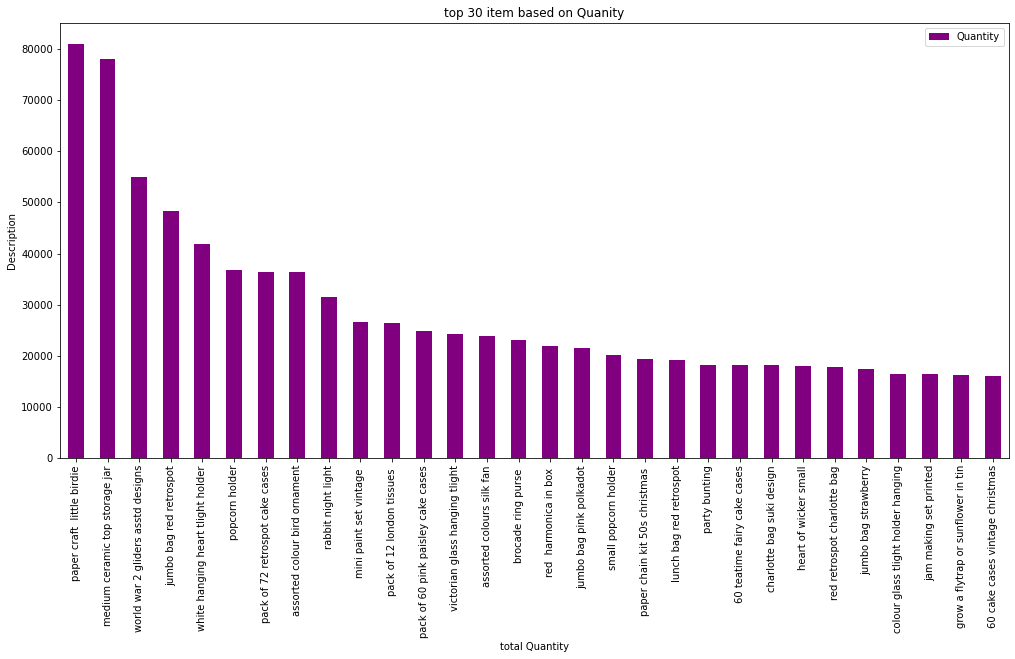

In [103]:


desc_quant=df.groupby('Description')['Quantity'].sum().to_frame().sort_values(by='Quantity',ascending=False).head(30)

desc_quant.plot(kind='bar',color='purple',figsize=(17,8))
plt.title('top 30 item based on Quanity')
plt.xlabel('total Quantity')
plt.ylabel('Description')
plt.show()

### top 30 most selling product

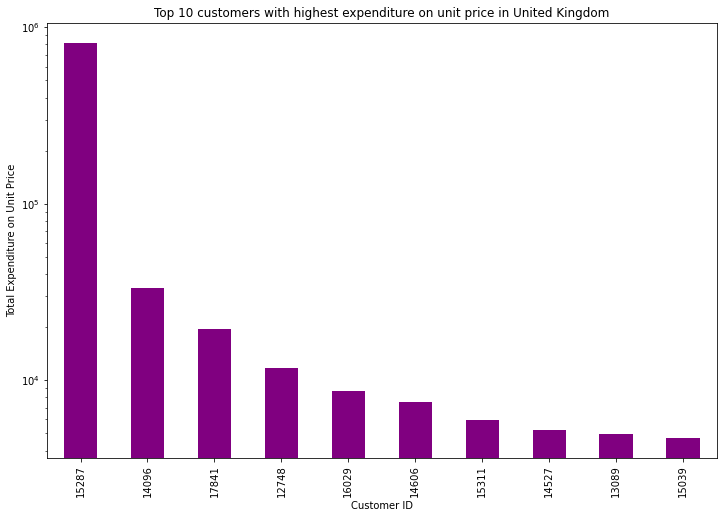

In [104]:
plt.figure(figsize=(12,8))

# group the data by country and customer id, and calculate the sum of the unit price
country_cust_spent = df.groupby(['Country', 'CustomerID']).sum()['UnitPrice']

# find the country with the highest expenditure on unit price
max_spent_country = country_cust_spent.groupby('Country').sum().sort_values(ascending=False).index[0]

# filter the data to include only the customers from the country with highest expenditure
max_spent_cust = country_cust_spent[max_spent_country].sort_values(ascending=False)[:10]

# plot the data
max_spent_cust.plot(kind='bar', color='purple')

# set the title and axis labels
plt.title('Top 10 customers with highest expenditure on unit price in {}'.format(max_spent_country))
plt.xlabel('Customer ID')
plt.ylabel('Total Expenditure on Unit Price')
plt.yscale('log')
plt.show()


In [105]:
# 15287 most expensive customer

In [106]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day',
       'day_of_week', 'hour', 'week_name', 'toal_amount'],
      dtype='object')

                   Country  CustomerID  UnitPrice
3                Australia       12415     350.00
9                  Austria       12358      40.00
21                 Bahrain       12355      12.75
31                 Belgium       12395      39.95
48                  Brazil       12769      10.95
51                  Canada       17444     550.94
56         Channel Islands       14931     293.00
63                  Cyprus       12365     320.69
70          Czech Republic       12781      40.00
71                 Denmark       12367      18.00
83                    EIRE       15287    1917.00
84      European Community       15108      18.00
88                 Finland       12428     275.60
113                 France       12536    4161.06
270                Germany       13810     599.50
280                 Greece       12717      50.00
283              Hong Kong       15287    2653.95
284                Iceland       12347      12.75
287                 Israel       12688     125.00


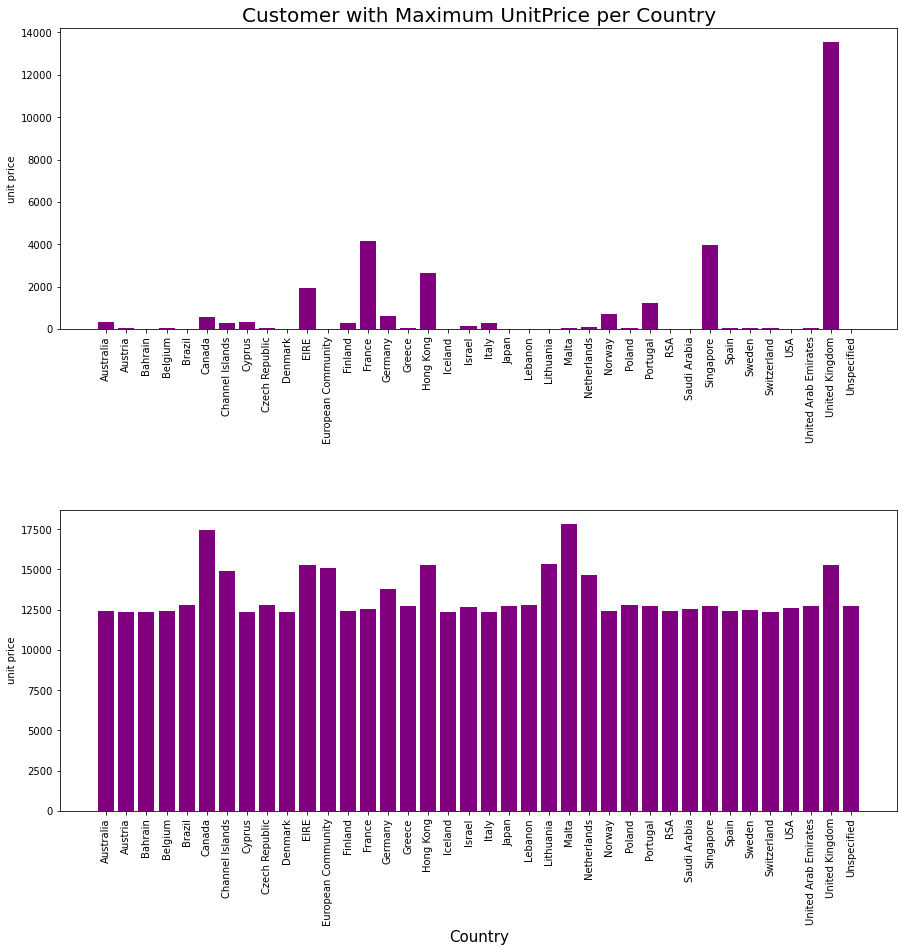

In [107]:
max_unitprice = df.groupby(['Country', 'CustomerID'])['UnitPrice'].max().reset_index()
max_unitprice_idx = max_unitprice.groupby('Country')['UnitPrice'].idxmax()
#idxmax() is a pandas function that returns the index of the maximum value in a pandas Series or DataFrame.
max_unitprice_cust = max_unitprice.loc[max_unitprice_idx]
print(max_unitprice_cust)
#max_unitprice_cust

plt.figure(figsize=(15,15))

plt.subplot(2,1,1)

plt.bar(max_unitprice_cust['Country'], max_unitprice_cust['UnitPrice'], color='purple')
plt.title('Customer with Maximum UnitPrice per Country',fontsize=20)

plt.ylabel('unit price')
plt.xticks(rotation=90)


plt.subplot(2,1,2)

plt.bar(max_unitprice_cust['Country'], max_unitprice_cust['CustomerID'], color='purple')

plt.xlabel('Country',fontsize=15)
plt.ylabel('unit price')
plt.xticks(rotation=90)


plt.subplots_adjust(hspace = 0.6, top = 0.85)
plt.show()



### Customer segmentation analysis

**Customer segmentation analysis** is a process of dividing customers into groups based on their common characteristics and behaviors, so that businesses can better understand and target their customers. Some of the things that can be done in customer segmentation analysis are:

**Demographic segmentation:** Segmenting customers based on age, gender, income, education, occupation, etc.

**Geographic segmentation:** Segmenting customers based on their geographic location, such as country, city, zip code, etc.

**Psychographic segmentation:** Segmenting customers based on their personality traits, values, interests, lifestyle, etc.

**Behavioral segmentation:** Segmenting customers based on their buying behavior, such as purchase frequency, purchase amount, brand loyalty, etc.

**RFM analysis:** A combination of behavioral segmentation, which stands for Recency, Frequency, and Monetary value. It measures the recentness of customer purchases, how often they make purchases, and how much they spend.

***

**Recency:** The value of how recently a customer purchased at the establishment
**Frequency:** How frequent the customer’s transactions are at the establishment
**Monetary value:** The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

***

**Customer lifetime value analysis:** Analyzing the total value a customer brings to the business over their lifetime, including all purchases and referrals.

**Churn analysis:** Identifying customers who are at risk of leaving the business and taking actions to prevent them from doing so.

**Persona development:** Creating fictional personas that represent typical customers in different segments, to better understand their needs, motivations, and behaviors.

**Customized marketing campaigns:** Creating targeted marketing campaigns for each customer segment, based on their unique characteristics and behaviors.

**Customer experience improvement:** Improving the customer experience for each segment, by tailoring products, services, and interactions to their specific needs and preferences.







### RFM analysis

**RFM analysis** is a customer segmentation technique that stands for Recency, Frequency, and Monetary Value. It helps to identify customers who are most valuable to a business by analyzing their past purchasing behavior.

The steps to perform RFM analysis are as follows:

**Recency:** Determine the most recent purchase date of each customer. This could be the date of the last order placed, or the date of the last website visit, or the date of the last interaction with the company. Assign a score based on recency, with the most recent customers receiving the highest score.

**Frequency:** Determine the number of purchases made by each customer within a specified time period (usually one year). Assign a score based on frequency, with the most frequent customers receiving the highest score.

**Monetary Value:** Determine the total amount of money spent by each customer within the specified time period. Assign a score based on monetary value, with the highest spending customers receiving the highest score.

**Combine the scores for each customer:** Once you have assigned scores for each of the three factors, combine them into an overall RFM score. This can be done in a number of ways, such as adding up the three scores or averaging them.

**Segment the customers:** Finally, group the customers based on their RFM scores. This can be done in a number of ways, such as by dividing them into quartiles or quintiles, or by using clustering techniques.

RFM analysis can provide valuable insights into customer behavior and help businesses to identify their most valuable customers, as well as opportunities for targeted marketing and retention strategies.







# Recency

 - Determine the most recent purchase date of each customer. This could be the date of the last order placed, or the date of the last website visit, or the date of the last interaction with the company. Assign a score based on recency, with the most recent customers receiving the highest score.

In [108]:
import datetime as dt

In [109]:
# Calculate the latest date available in the dataset and add one day to set it as a reference point
#timedelta is a Python class in the datetime module that represents a duration or the difference between two dates or times
latest_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
latest_date

Timestamp('2011-12-10 12:50:00')

In [110]:
df['recency'] = (latest_date - df['InvoiceDate']).astype('timedelta64[D]')

In [111]:
rfm_table =  df.groupby('CustomerID')['recency'].min().reset_index()

rfm_table

# min no. of days-  Determine the most recent purchase date of each customer.

,CustomerID,recency
0,12346,326.0
1,12347,2.0
2,12348,75.0
3,12349,19.0
4,12350,310.0
...,...,...
4334,18280,278.0
4335,18281,181.0
4336,18282,8.0
4337,18283,4.0


In [112]:
customer_history_df = rfm_table.copy()

In [113]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day',
       'day_of_week', 'hour', 'week_name', 'toal_amount', 'recency'],
      dtype='object')

## Frequency


**Frequency:** Determine the number of purchases made by each customer within a specified time period 

In [114]:
count_table=df.groupby('CustomerID').count()['InvoiceNo'].to_frame().reset_index()
count_table.rename(columns={'InvoiceNo': 'frequency'}, inplace=True)
count_table

,CustomerID,frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,721


In [115]:
# Merge the two tables on 'CustomerID'
rfm_table = rfm_table.merge(count_table, on='CustomerID')


# Print the resulting table
print(rfm_table)

      CustomerID  recency  frequency
0          12346    326.0          1
1          12347      2.0        182
2          12348     75.0         31
3          12349     19.0         73
4          12350    310.0         17
...          ...      ...        ...
4334       18280    278.0         10
4335       18281    181.0          7
4336       18282      8.0         12
4337       18283      4.0        721
4338       18287     43.0         70

[4339 rows x 3 columns]


In [116]:
rfm_table

,CustomerID,recency,frequency
0,12346,326.0,1
1,12347,2.0,182
2,12348,75.0,31
3,12349,19.0,73
4,12350,310.0,17
...,...,...,...
4334,18280,278.0,10
4335,18281,181.0,7
4336,18282,8.0,12
4337,18283,4.0,721


### monentary

 - **Monetary Value:** Determine the total amount of money spent by each customer within the specified time period.

In [117]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day',
       'day_of_week', 'hour', 'week_name', 'toal_amount', 'recency'],
      dtype='object')

In [118]:
monetary=df.groupby('CustomerID').sum()['toal_amount'].to_frame()
monetary.rename(columns={'toal_amount': 'monetary'}, inplace=True)

In [119]:
rfm_table = rfm_table.merge(monetary, on='CustomerID')

In [120]:
rfm_table

,CustomerID,recency,frequency,monetary
0,12346,326.0,1,77183.60
1,12347,2.0,182,4310.00
2,12348,75.0,31,1797.24
3,12349,19.0,73,1757.55
4,12350,310.0,17,334.40
...,...,...,...,...
4334,18280,278.0,10,180.60
4335,18281,181.0,7,80.82
4336,18282,8.0,12,178.05
4337,18283,4.0,721,2045.53


In [121]:
rfm_table.describe()

,CustomerID,recency,frequency,monetary
count,4339.000000,4339.000000,4339.000000,4.339000e+03
mean,15299.936852,92.513482,121.234386,2.452664e+03
std,1721.889758,100.013669,2035.172529,2.809307e+04
min,12346.000000,1.000000,1.000000,0.000000e+00
25%,13812.500000,18.000000,17.000000,3.064550e+02
50%,15299.000000,51.000000,41.000000,6.685800e+02
75%,16778.500000,142.000000,98.000000,1.660890e+03
max,18287.000000,374.000000,133324.000000,1.755389e+06


In [122]:
rfm_table.set_index('CustomerID',inplace=True)

In [123]:
rfm_table

,recency,frequency,monetary
CustomerID,,,
12346,326.0,1,77183.60
12347,2.0,182,4310.00
12348,75.0,31,1797.24
12349,19.0,73,1757.55
12350,310.0,17,334.40
...,...,...,...
18280,278.0,10,180.60
18281,181.0,7,80.82
18282,8.0,12,178.05


In [124]:
# copy rfm table for further analysis

rfm_table_copy=rfm_table.copy()

In [125]:
RFM_Table=rfm_table.copy()

In [126]:
# Recency - Determine the most recent purchase date of each customer.- 

# high recency is not a good thing.  means customer coming back to purchase after a longer timer

# high frequency determines -more no.number of purchases made by each customer within a specified time period

# high monetary is a good idea  FOR BUSINESS PURCHASE  bcz people are spending large amount of money

In [127]:
# now make pair like where
# recency is low and frequency and monetary is high -- best customer
# recency is high and frequency and monetary is low - not a good cusotmer

In [128]:
# Create labels for R and F segments
r_labels = range(4, 0, -1)
f_labels = range(1, 5)


# Assign labels to R and F segments
r_quartiles = pd.qcut(rfm_table['recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm_table['frequency'], q=4, labels=f_labels)


# Calculate and add M segments to the RFM table
m_labels = range(1, 5)
m_quartiles = pd.qcut(rfm_table['monetary'], q=4, labels=m_labels)

#### for recency ranges like 1(come back after long time) is for wrost and 4(customer come back in regurlar interval of time) is best
***

#### for frequency ranges 4 is for best (more no.number of purchases made by each customer) and 1 is worst 

In [129]:
# in recency 1 is given for a person with more no. od days gap,  and 4 is given to person which has less no. of gap

In [130]:
# Add R , F  and M segments to the RFM table

#assign - Returns a new object with all original columns in addition to new ones. Existing columns that are re-assigned will be overwritten.

rfm_table = rfm_table.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)

In [131]:
rfm_table.head()

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
12346,326.0,1,77183.60,1,1,4
12347,2.0,182,4310.00,4,4,4
12348,75.0,31,1797.24,2,2,4
12349,19.0,73,1757.55,3,3,4
12350,310.0,17,334.40,1,1,2


In [132]:

# Combine RFM segments to create RFM score

rfm_table['RFM_Score'] = rfm_table['R'].astype(str) + rfm_table['F'].astype(str) + rfm_table['M'].astype(str)

In [133]:
rfm_table

,recency,frequency,monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12346,326.0,1,77183.60,1,1,4,114
12347,2.0,182,4310.00,4,4,4,444
12348,75.0,31,1797.24,2,2,4,224
12349,19.0,73,1757.55,3,3,4,334
12350,310.0,17,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280,278.0,10,180.60,1,1,1,111
18281,181.0,7,80.82,1,1,1,111
18282,8.0,12,178.05,4,1,1,411


In [134]:
# making pair

# recency start with 4  are the best customer -- coming on the regular bases
# recency start with 1 are the lost customer -- visited long time ago


# frequency start with 4 are the best customer -- more no.number of purchases made by each customer within a specified time period
# frequency start with 1 are the those customer - who purchse very less no. of item


# monetary start with 4 are the customer - who spend a lot of money 
# monetary stary with 1 are the customer - who spend less amount of money


# customer with RFM = 444 -- means - those customer who are visited on regualr bases, purchase more no. of item and spend more
# customer with 111,112 - means lost customer -- visted long back ago, less purchase and less amount spend





In [135]:
# Define function to create custom segments
def rfm_segment(row):
    rfm_score = row['RFM_Score']
    if rfm_score in ['444', '443', '434', '433']:
        return 'Best Customers '
    
    elif rfm_score in ['334', '343', '344','333','332','322']:
        return 'Loyal Customers '
    
    elif rfm_score in ['111', '112','124', '123', '122', '113', '114', '104', '103', '102']:
        return 'Churned Customers'
    
    elif rfm_score in ['211', '212', '221', '222', '231', '232', '241', '242','322']:
        return 'Potential Loyalists'
    
    elif rfm_score in ['144', '143', '134', '133']:
        return 'Big Spenders but amlost lost '
    
    elif rfm_score in ['244', '243', '233']:
        return 'need to focus'
    
    elif rfm_score in ['424', '423', '414', '413', '404', '403']:
        return 'Promising Customers'
    
    elif rfm_score in ['411','412','422']:
        return 'regular Customers'
    
    else:
        return 'Needs Attention'

In [136]:
# Add custom segments to the RFM table
rfm_table['Segment'] = rfm_table.apply(rfm_segment, axis=1)

# Display the RFM table



In [137]:
rfm_table.sample(10)

,recency,frequency,monetary,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
14859,13.0,58,1353.74,4,3,3,433,Best Customers
15725,15.0,32,415.25,4,2,2,422,regular Customers
13831,16.0,72,2198.45,4,3,4,434,Best Customers
16224,57.0,96,1295.30,2,3,3,233,need to focus
15801,46.0,64,1063.95,3,3,3,333,Loyal Customers
16940,52.0,305,3049.88,2,4,4,244,need to focus
15117,15.0,79,1551.78,4,3,3,433,Best Customers
15500,8.0,68,1131.56,4,3,3,433,Best Customers
15906,20.0,150,1567.69,3,4,3,343,Loyal Customers


# output

In [138]:
print("Best Customers: ",len(rfm_table[rfm_table['RFM_Score']=='444']))

print('Loyal Customers: ',len(rfm_table[rfm_table['F']==4]))

print("Big Spenders: ",len(rfm_table[rfm_table['M']==4]))

print('Almost Lost: ', len(rfm_table[rfm_table['RFM_Score']=='244']))

print('Lost Customers: ',len(rfm_table[rfm_table['RFM_Score']=='144']))

print('Lost Cheap Customers: ',len(rfm_table[rfm_table['RFM_Score']=='111']))

Best Customers:  450
Loyal Customers:  1081
Big Spenders:  1085
Almost Lost:  103
Lost Customers:  22
Lost Cheap Customers:  381


# K-Means method

In [148]:
RFM_Table.head()

,recency,frequency,monetary
CustomerID,,,
12346,326.0,1,77183.60
12347,2.0,182,4310.00
12348,75.0,31,1797.24
12349,19.0,73,1757.55
12350,310.0,17,334.40


In [149]:
RFM_Table.reset_index()

,CustomerID,recency,frequency,monetary
0,12346,326.0,1,77183.60
1,12347,2.0,182,4310.00
2,12348,75.0,31,1797.24
3,12349,19.0,73,1757.55
4,12350,310.0,17,334.40
...,...,...,...,...
4334,18280,278.0,10,180.60
4335,18281,181.0,7,80.82
4336,18282,8.0,12,178.05
4337,18283,4.0,721,2045.53


Text(0.5, 0, 'Attributes')

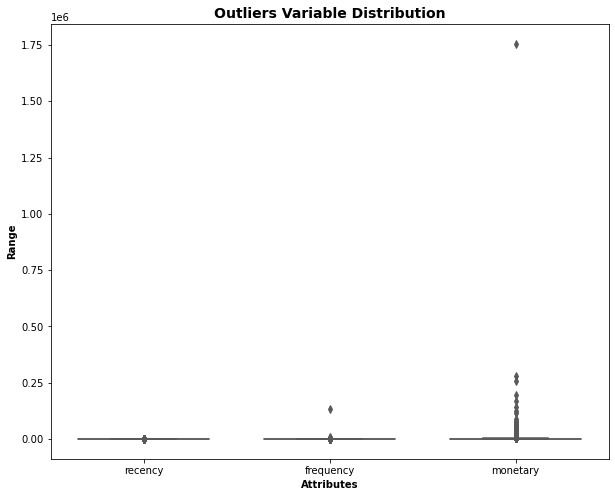

In [150]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['recency','frequency','monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM_Table[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [151]:
# Removing outliers for Recency

Q1 = RFM_Table.recency.quantile(0.05)
Q3= RFM_Table.recency.quantile(0.95)
IQR=(Q3-Q1)
RFM_Table = RFM_Table[(RFM_Table.recency >= Q1 - 1.5*IQR) & (RFM_Table.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = RFM_Table.frequency.quantile(0.05)
Q3= RFM_Table.frequency.quantile(0.95)
IQR=(Q3-Q1)
RFM_Table = RFM_Table[(RFM_Table.frequency >= Q1 - 1.5*IQR) & (RFM_Table.frequency <= Q3 + 1.5*IQR)]

# removing outliers for monetary

Q1 = RFM_Table.monetary.quantile(0.05)
Q3= RFM_Table.monetary.quantile(0.95)
IQR=(Q3-Q1)
RFM_Table = RFM_Table[(RFM_Table.monetary >= Q1 - 1.5*IQR) & (RFM_Table.monetary <= Q3 + 1.5*IQR)]



In [152]:
RFM_Table.shape


# after removing outlier of quantile 5% and 95%  , out of 4339  rows,  we have 4255 rows remaning

(4255, 3)

In [153]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [154]:
rfm_new_df=RFM_Table[['recency', 'frequency', 'monetary']]

In [155]:
# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_new_df)
rfm_df_scaled.shape

(4255, 3)

In [156]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)

rfm_df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,-0.918166,1.084329,1.692087
1,-0.189629,-0.455521,0.276173
2,-0.748507,-0.027219,0.253808
3,2.155663,-0.598289,-0.548122
4,-0.578847,0.095154,0.675574


# Elbow method

- The Elbow method is a technique used to determine the optimal number of clusters in a dataset for a clustering algorithm. It is a heuristic approach that involves plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters, and then selecting the number of clusters at the "elbow" of the curve.

 - The WCSS measures the total squared distance between each point and its assigned cluster center, and is calculated as the sum of the squared distances for all points in all clusters. The WCSS decreases as the number of clusters increases, because with more clusters, each point is closer to its assigned cluster center. However, adding too many clusters can result in overfitting and reduced interpretability of the clusters.

 - To use the Elbow method, we plot the WCSS as a function of the number of clusters. The resulting curve typically looks like an arm, hence the name "Elbow" method. The idea is to choose the number of clusters at the "elbow" of the curve, which is the point of diminishing returns where adding more clusters does not lead to a significant decrease in the WCSS.

 - In practice, the choice of the number of clusters is often somewhat subjective, and depends on the specific problem and goals of the analysis. However, the Elbow method provides a useful heuristic for selecting an appropriate number of clusters.

# Silhouette score

 - **Silhouette score** is a metric used to measure the quality of a clustering solution. It quantifies how well each data point fits into its assigned cluster based on two measures:
***
 - **Cohesion:** the average distance between a data point and all other points in the same cluster.

 - **Separation:** the average distance between a data point in one cluster and all data points in the nearest neighboring cluster.

***
 - The silhouette score ranges from -1 to 1, where a score closer to 1 indicates a better clustering solution. A score of 0 indicates that the data point is on the boundary between two clusters, and a score of -1 indicates that the data point is assigned to the wrong cluster.

 - In general, a higher silhouette score indicates that the clustering solution is more appropriate for the data. However, the optimal value for the silhouette score can vary depending on the specific problem and data set.

 - The silhouette score can be calculated using the silhouette_score function from the scikit-learn library in Python. In the context of k-means clustering, the silhouette score can be used to determine the optimal number of clusters, by comparing the scores for different values of k and selecting the value that maximizes the score.

# K-means++

 - Place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.
 - To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to k-means++ (the default setting) instead of random.

In [157]:
# Determine the optimal number of clusters
wcss = []
silhouette_scores = []
for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_df_scaled, kmeans.labels_))
    
print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_scores))
    


For n_clusters=39, the silhouette score is [0.5423386323002756, 0.5088781822656095, 0.4815600076545586, 0.46872944419167767, 0.41670428853741975, 0.4152682272117974, 0.40229343246646976, 0.3729458251241511, 0.3794623776897977, 0.3435357268250051, 0.3231631083074592, 0.32323059044028024, 0.31850390882709195, 0.3292550159763165, 0.33181800817888685, 0.33521972727106814, 0.32057727125551, 0.3225861249577001, 0.3217411039150524, 0.3146722541155939, 0.3157498867602806, 0.3177070343841942, 0.3181856577382071, 0.31334806617012395, 0.3152825541992613, 0.3096910135409705, 0.3077501384539852, 0.308280532760447, 0.3006738950852724, 0.3048268713809983, 0.3128386206060266, 0.3178430949868562, 0.298909652508522, 0.30388833719926, 0.29503158868107326, 0.30022728365367224, 0.2931024846315178, 0.2914233818644575]


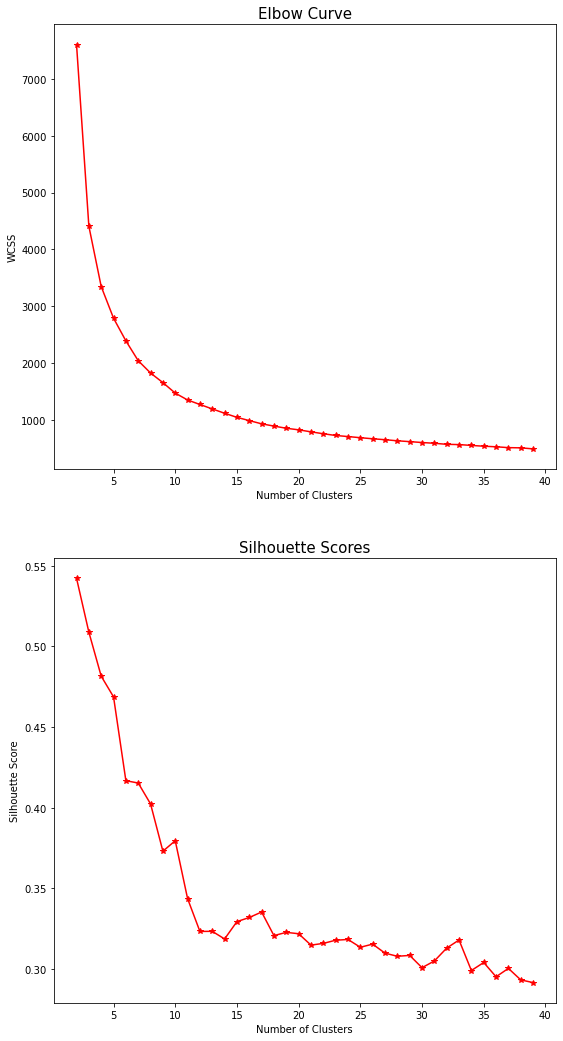

In [158]:
# Plot the elbow curve and silhouette scores
fig, axs = plt.subplots(2, 1, figsize=(9, 18))
axs[0].plot(range(2, 40), wcss,color='red',marker='*')
axs[0].set_title('Elbow Curve',fontsize =15)
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('WCSS')


# Plot silhouette scores

axs[1].plot(range(2, 40), silhouette_scores,color='red',marker='*')
axs[1].set_title('Silhouette Scores',fontsize =15)
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Silhouette Score')
plt.show()


In [159]:
silhouette_scores=pd.DataFrame(silhouette_scores)
#silhouette_scores = silhouette_scores.reset_index(drop=True)
silhouette_scores.index = silhouette_scores.index + 2

#silhouette_scores.reset_index()
silhouette_scores.columns=['silhouette_scores']
silhouette_scores = silhouette_scores.reset_index()

silhouette_scores.columns=['Cluster_num','silhouette_scores']
silhouette_scores

,Cluster_num,silhouette_scores
0,2,0.542339
1,3,0.508878
2,4,0.481560
3,5,0.468729
4,6,0.416704
5,7,0.415268
6,8,0.402293
7,9,0.372946
8,10,0.379462
9,11,0.343536


In [160]:
# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=7, init='k-means++',max_iter=50, random_state=42)
kmeans.fit(rfm_df_scaled) 

KMeans(max_iter=50, n_clusters=7, random_state=42)

In [161]:
kmeans.labels_

array([4, 2, 0, ..., 2, 6, 0])

In [162]:
RFM_Table.reset_index(inplace=True)

In [163]:

# Add the cluster labels to the original data
RFM_Table['Cluster'] = kmeans.labels_

In [164]:
RFM_Table.sample(5)

,CustomerID,recency,frequency,monetary,Cluster
3827,17690,30.0,252,4726.80,4
910,13590,11.0,87,1981.92,0
1699,14710,14.0,136,599.48,0
3480,17198,24.0,96,692.22,2
3187,16780,100.0,59,422.24,2


<AxesSubplot:xlabel='Cluster', ylabel='recency'>

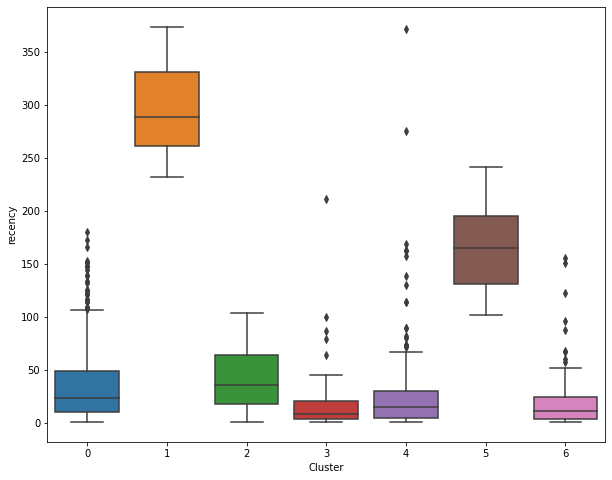

In [165]:
# Box plot to visualize Cluster  vs recency

sns.boxplot(x='Cluster', y='recency', data=RFM_Table)


By creating a boxplot for 'recency' across different clusters, we can compare the distribution of 'recency' values for each cluster and identify any potential differences between them. For example, if the boxes for different clusters are located at different positions, it may suggest that the clusters differ in terms of how recently customers made a purchase. Alternatively, if the boxes are similar, it may indicate that the clusters have similar purchase patterns in terms of recency.

<AxesSubplot:xlabel='Cluster', ylabel='frequency'>

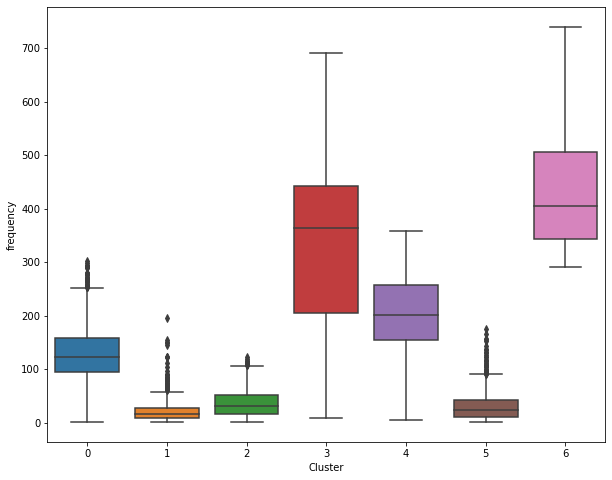

In [166]:
# Box plot to visualize Cluster  vs recency

sns.boxplot(x='Cluster', y='frequency', data=RFM_Table)


By creating a boxplot for 'frequency' across different clusters, we can compare the distribution of 'frequency' values for each cluster and identify any potential differences between them. For example, if the boxes for different clusters are located at different positions, it may suggest that the clusters differ in terms of how frequently customers make a purchase. Alternatively, if the boxes are similar, it may indicate that the clusters have similar purchase patterns in terms of frequency.

<AxesSubplot:xlabel='Cluster', ylabel='monetary'>

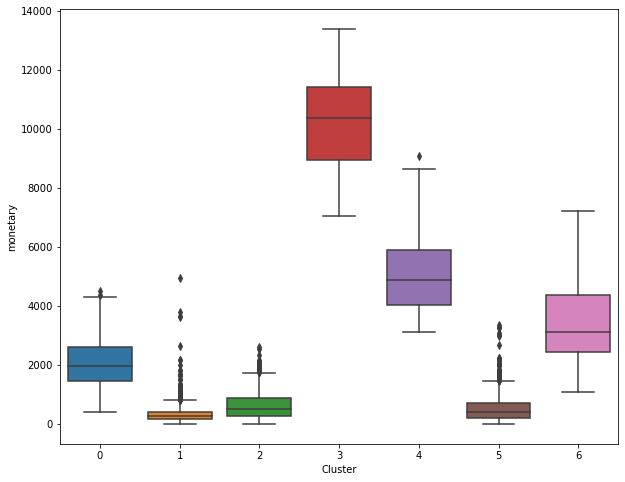

In [167]:
sns.boxplot(x='Cluster', y='monetary', data=RFM_Table)

By creating a boxplot for 'monetary' across different clusters, we can compare the distribution of 'monetary' values for each cluster and identify any potential differences between them. For example, if the boxes for different clusters are located at different positions, it may suggest that the clusters differ in terms of how much money customers spend on their purchases. Alternatively, if the boxes are similar, it may indicate that the clusters have similar purchase patterns in terms of monetary value.

# The Diference b/w Elbow method and the Silhouette method


 - The **Elbow method** and the Silhouette method are two commonly used techniques to determine the optimal number of clusters in a dataset for a clustering algorithm.

 - The **Elbow method** involves plotting the **within-cluster sum of squares (WCSS)** as a function of the number of clusters, and then selecting the number of clusters at the "elbow" of the curve. The idea is to choose the number of clusters at the point of diminishing returns where adding more clusters does not lead to a significant decrease in the WCSS.

 - The **Silhouette method** involves computing the Silhouette coefficient for each data point in the clustering solution, which measures how well the data point fits into its assigned cluster compared to other clusters. The Silhouette coefficient ranges from **-1 to 1**, where a score closer to 1 indicates a better clustering solution. The Silhouette curve is then plotted as a function of the number of clusters, and the optimal number of clusters is selected based on the highest Silhouette score.

 - **Both methods** can be used to **determine the optimal number of clusters for a given dataset**, but they differ in how they evaluate the clustering solution. The Elbow method considers the amount of variance explained by the clusters, whereas the Silhouette method evaluates the quality of the clusters in terms of how well they separate the data points.

 - The **Elbow method** is useful for identifying the point of diminishing returns where adding more clusters does not lead to a significant decrease in the WCSS. However, it does not consider the quality of the clustering solution beyond the amount of variance explained. The **Silhouette method,** on the other hand, provides a more comprehensive evaluation of the clustering solution, taking into account both the amount of variance explained and the quality of the clusters. However, it can be more computationally intensive and may be less intuitive to interpret than the Elbow method.

# Hierarchical clustering

 - **Hierarchical clustering** is a type of unsupervised machine learning algorithm used to group together similar objects into clusters. It is a bottom-up approach in which the algorithm starts with each data point as its own cluster and iteratively merges the closest pairs of clusters until all data points belong to a single cluster or a predefined number of clusters is reached.
***
There are two types of hierarchical clustering:

 - **Agglomerative clustering:** This is the most common approach, in which the algorithm starts with each data point as a separate cluster and iteratively merges the closest pairs of clusters until all data points belong to a single cluster.

 - **Divisive clustering:** This is a top-down approach in which the algorithm starts with all data points in a single cluster and recursively splits the cluster into smaller subclusters until each data point is in its own cluster.

***
 - Hierarchical clustering can be visualized using a dendrogram, which is a tree-like diagram that shows the hierarchy of clusters. The height of each branch in the dendrogram represents the distance between the clusters being merged.

 - Hierarchical clustering has many applications, including in market segmentation, image analysis, and bioinformatics.



 - In **hierarchical clustering,** the choice of linkage method determines how the distance between two clusters is calculated. The linkage method is used to merge clusters at each step of the algorithm.




 - **Ward's method** is a popular linkage method that minimizes the sum of squared differences within all clusters. It tries to minimize the variance of the clusters being merged, and thus tends to create compact, spherical clusters.

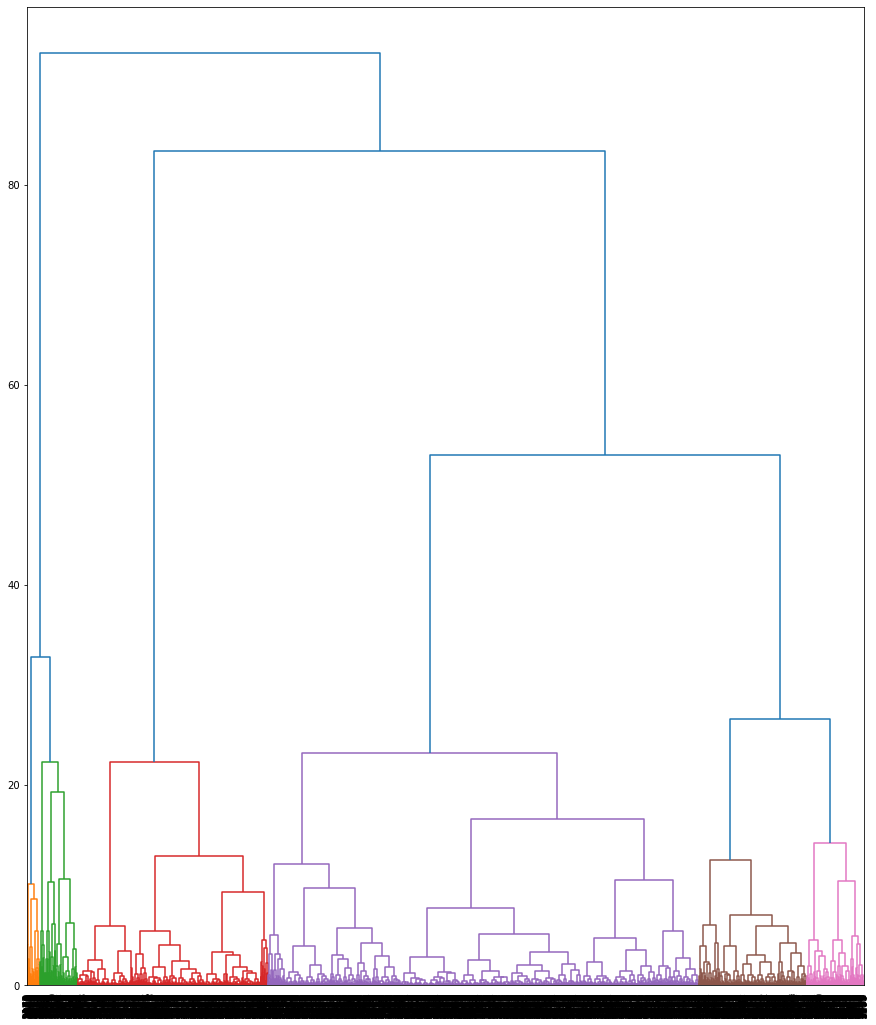

In [168]:
#Using Dendogram to choose the number of clusters 
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(15,18))
merg=linkage(rfm_df_scaled,method='ward',metric='euclidean')
dendrogram(merg,p=30,leaf_rotation=90,color_threshold=25,leaf_font_size=10,truncate_mode='level')
plt.plot([125]*2000000, color='r')
plt.show()

- **complete linkage** (also known as maximum linkage) considers the maximum distance between all pairs of points in two clusters when merging them. It tends to produce more elongated clusters and may be more appropriate when dealing with non-spherical clusters.

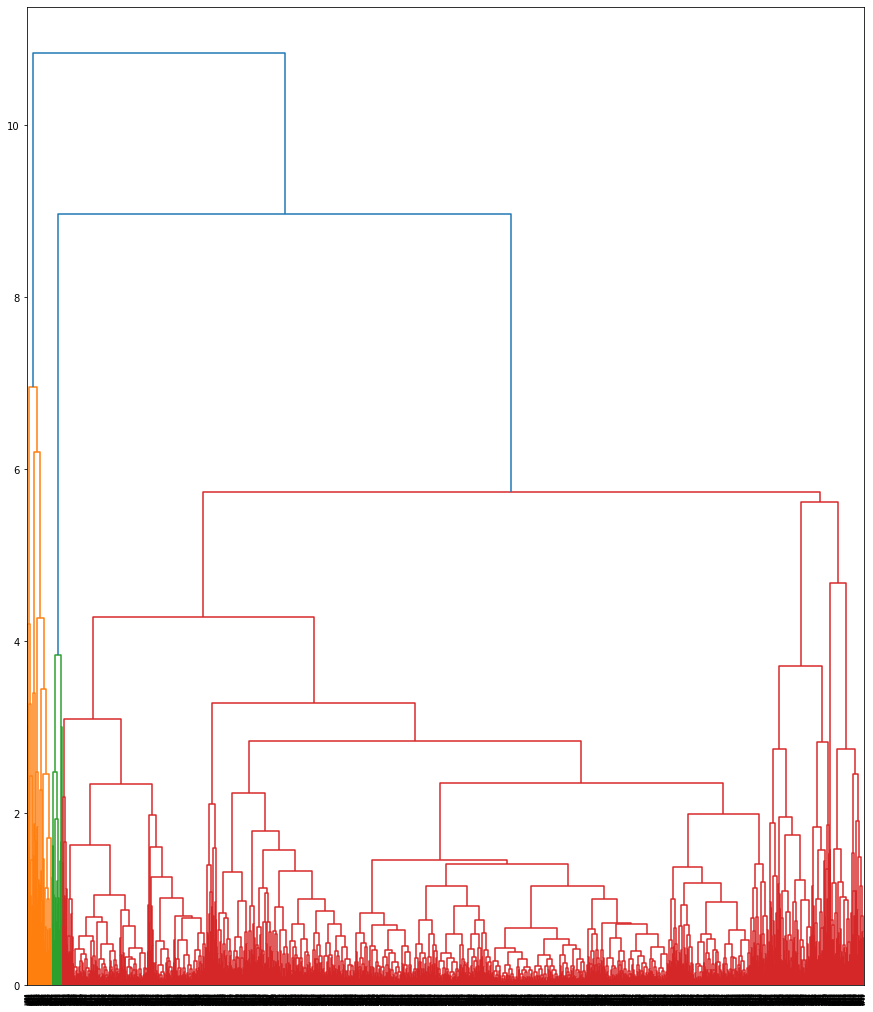

In [169]:
plt.figure(figsize=(15,18))
merg=linkage(rfm_df_scaled,method='complete',metric='euclidean')
dendrogram(merg)
plt.plot([125]*2000000, color='r')
plt.show()

 - Dendrograms can provide insights into the hierarchical structure of the data by showing how the data points are grouped based on their similarity. The height of the branches in a dendrogram shows the degree of similarity between the clusters or data points being merged.
 
 - The dendrogram can help in identifying natural clusters in the data based on the similarity measure used in clustering. It can also help in deciding the appropriate number of clusters to use in further analysis. The position of the horizontal line where the dendrogram is cut determines the number of clusters. Clusters can be identified by looking at the groups of data points that are formed below the cut-off line
 
  - 

In [170]:
from scipy.cluster.hierarchy import fcluster

In [171]:
# Extract the cluster labels for a distance threshold of 4
labels = fcluster(merg, 5, criterion='distance')

# Count the unique labels to get the number of clusters
n_clusters = len(set(labels))
print('Number of clusters:', n_clusters)

Number of clusters: 7


In [172]:
# Final model with k=7
kmeans = KMeans(n_clusters=7, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=7)

In [173]:
kmeans.labels_

array([5, 6, 1, ..., 6, 2, 1])

In [174]:
# assign the label
RFM_Table['Cluster_Labels'] = kmeans.labels_
RFM_Table.head()

,CustomerID,recency,frequency,monetary,Cluster,Cluster_Labels
0,12347,2.0,182,4310.00,4,5
1,12348,75.0,31,1797.24,2,6
2,12349,19.0,73,1757.55,0,1
3,12350,310.0,17,334.40,1,0
4,12352,36.0,85,2506.04,0,1


<AxesSubplot:xlabel='Cluster_Labels', ylabel='recency'>

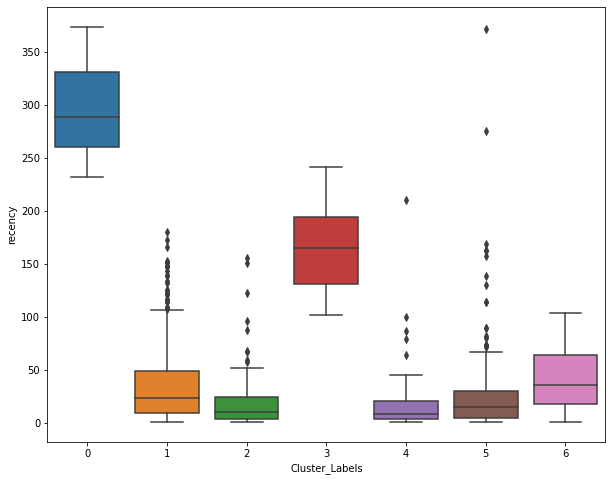

In [175]:
# Box plot to visualize Cluster  vs recency

sns.boxplot(x='Cluster_Labels', y='recency', data=RFM_Table)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='frequency'>

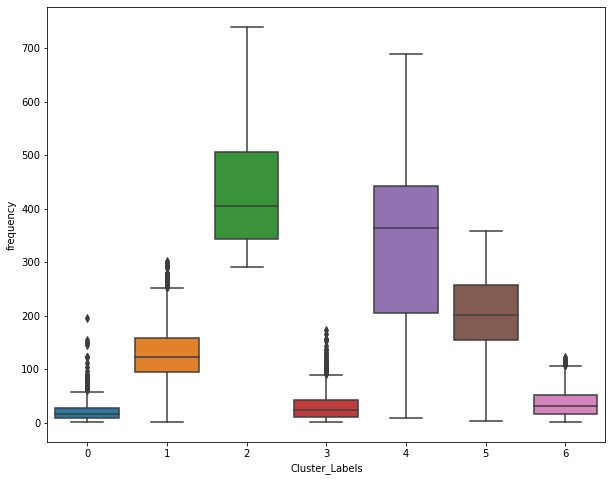

In [176]:
# Box plot to visualize Cluster  vs recency

sns.boxplot(x='Cluster_Labels', y='frequency', data=RFM_Table)


<AxesSubplot:xlabel='Cluster_Labels', ylabel='monetary'>

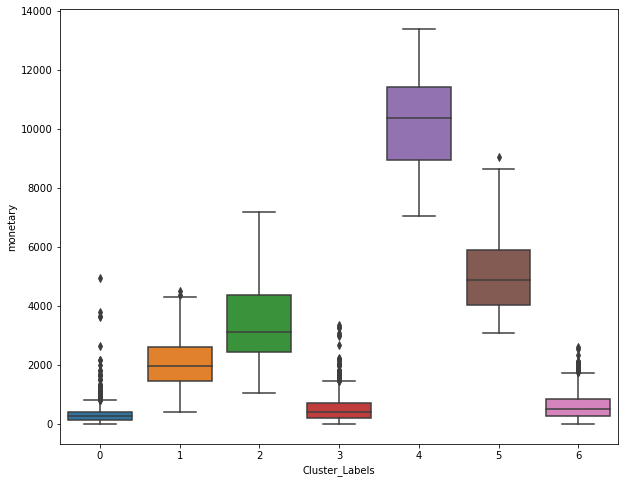

In [177]:
# Box plot to visualize Cluster  vs monetary

sns.boxplot(x='Cluster_Labels', y='monetary', data=RFM_Table)

In [178]:
RFM_Table

,CustomerID,recency,frequency,monetary,Cluster,Cluster_Labels
0,12347,2.0,182,4310.00,4,5
1,12348,75.0,31,1797.24,2,6
2,12349,19.0,73,1757.55,0,1
3,12350,310.0,17,334.40,1,0
4,12352,36.0,85,2506.04,0,1
...,...,...,...,...,...,...
4250,18280,278.0,10,180.60,1,0
4251,18281,181.0,7,80.82,5,3
4252,18282,8.0,12,178.05,2,6
4253,18283,4.0,721,2045.53,6,2


**Recency:** Determine the most recent purchase date of each customer. This could be the date of the last order placed, or the date of the last website visit, or the date of the last interaction with the company. Assign a score based on recency, with the most recent customers receiving the highest score.

**Frequency:** Determine the number of purchases made by each customer within a specified time period (usually one year). Assign a score based on frequency, with the most frequent customers receiving the highest score.

**Monetary Value:** Determine the total amount of money spent by each customer within the specified time period. Assign a score based on monetary value, with the highest spending customers receiving the highest score.

# output

### K-means

##### recency

 - customer ID in cluster 1 has high recency
 - customer ID in cluster 3,6 has low recency


##### frequent

- Determine the number of purchases made by each customer within a specified time period

 - customer ID in cluster 1 has less freqent(less no. of purchase)
 - customer ID in cluster 3,6 has more frequent 

 
##### monetary

 - customer ID in cluster 1 spend less amount
 - customer ID in cluster 3,4,6 spend more amount
 
 
 - customerID in cluster 0 has low recency,low frequency and low monetary -- need to focus on this customer
 - customerID in cluster 1 has high recency,low frequency and low monetary -- lost customer
 
 

# Hierarchical


 - customerId in clusterlabel 4 , 5 - low recency , highly frequent and highly expensive - loyal customer